In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Preparation of the data
features = ['Card 1 Suit','Card 1 Rank','Card 2 Suit','Card 2 Rank','Card 3 Suit','Card 3 Rank','Card 4 Suit','Card 4 Rank','Card 5 Suit','Card 5 Rank','Poker Hand']
train_data=pd.read_csv('train.csv',sep= ',',names= features)
test_data=pd.read_csv('test.csv', sep= ',',names= features)

In [3]:
train_data.head()

,Card 1 Suit,Card 1 Rank,Card 2 Suit,Card 2 Rank,Card 3 Suit,Card 3 Rank,Card 4 Suit,Card 4 Rank,Card 5 Suit,Card 5 Rank,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [4]:
test_data.head()

,Card 1 Suit,Card 1 Rank,Card 2 Suit,Card 2 Rank,Card 3 Suit,Card 3 Rank,Card 4 Suit,Card 4 Rank,Card 5 Suit,Card 5 Rank,Poker Hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [5]:
pokerHandMap={ 0: "Nothing in the hand",\
               1: "One Pair",\
               2: "Two Pair",\
               3: "Three of a Kind",\
               4: "Straight",\
               5: "Flush",\
               6: "Full House",\
               7: "Four of a Kind",\
               8: "Straight Flush",\
               9: "Royal Flush" }
suitMap = {1:"Hearts", 2:"Spades", 3:"Diamonds", 4:"Clubs"}
data = pd.concat([train_data, test_data])

CategoryVariableList = ['Card 1 Suit','Card 1 Rank','Card 2 Suit','Card 2 Rank','Card 3 Suit','Card 3 Rank','Card 4 Suit','Card 4 Rank','Card 5 Suit','Card 5 Rank','Poker Hand']
for var in CategoryVariableList:
    data[var] = data[var].astype('float64')
    
    
#Pretifying data
prettyData = data
prettyData['Card 1 Suit']= data['Card 1 Suit'].map(suitMap)
prettyData['Card 2 Suit']= data['Card 2 Suit'].map(suitMap)
prettyData['Card 3 Suit']= data['Card 3 Suit'].map(suitMap)
prettyData['Card 4 Suit']= data['Card 4 Suit'].map(suitMap)
prettyData['Card 5 Suit']= data['Card 5 Suit'].map(suitMap)
prettyData['Poker Hand']= data['Poker Hand'].map(pokerHandMap)

In [6]:
data.head()

,Card 1 Suit,Card 1 Rank,Card 2 Suit,Card 2 Rank,Card 3 Suit,Card 3 Rank,Card 4 Suit,Card 4 Rank,Card 5 Suit,Card 5 Rank,Poker Hand
0,Hearts,10.0,Hearts,11.0,Hearts,13.0,Hearts,12.0,Hearts,1.0,Royal Flush
1,Spades,11.0,Spades,13.0,Spades,10.0,Spades,12.0,Spades,1.0,Royal Flush
2,Diamonds,12.0,Diamonds,11.0,Diamonds,13.0,Diamonds,10.0,Diamonds,1.0,Royal Flush
3,Clubs,10.0,Clubs,11.0,Clubs,1.0,Clubs,13.0,Clubs,12.0,Royal Flush
4,Clubs,1.0,Clubs,13.0,Clubs,12.0,Clubs,11.0,Clubs,10.0,Royal Flush


In [7]:
type(data)

pandas.core.frame.DataFrame

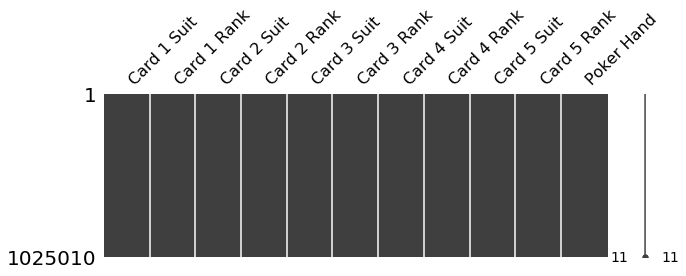

In [8]:
#Check for the Missing Data in the dataset
msno.matrix(data,figsize=(10,3))

In [9]:
data.describe() 

,Card 1 Rank,Card 2 Rank,Card 3 Rank,Card 4 Rank,Card 5 Rank
count,1.025010e+06,1.025010e+06,1.025010e+06,1.025010e+06,1.025010e+06
mean,6.997861e+00,7.006295e+00,6.999246e+00,7.000838e+00,6.988828e+00
std,3.743529e+00,3.744054e+00,3.741964e+00,3.741423e+00,3.739936e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
50%,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
75%,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
max,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01


In [10]:
data.isnull().sum()

Card 1 Suit    0
Card 1 Rank    0
Card 2 Suit    0
Card 2 Rank    0
Card 3 Suit    0
Card 3 Rank    0
Card 4 Suit    0
Card 4 Rank    0
Card 5 Suit    0
Card 5 Rank    0
Poker Hand     0
dtype: int64

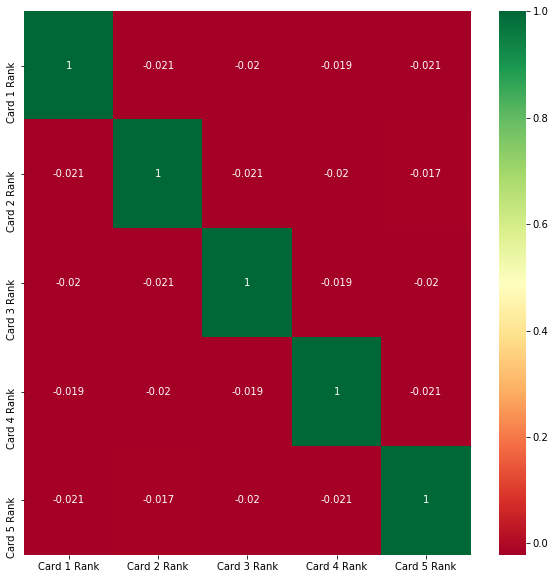

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
#Preparation of the data again because above we got the data which is in series type but we want dataframe type so we are converting the data
features = ['Card 1 Suit','Card 1 Rank','Card 2 Suit','Card 2 Rank','Card 3 Suit','Card 3 Rank','Card 4 Suit','Card 4 Rank','Card 5 Suit','Card 5 Rank','Poker Hand']
train_data=pd.read_csv('train.csv',sep= ',',names= features)
test_data=pd.read_csv('test.csv', sep= ',',names= features)
data = pd.concat([train_data, test_data])

numVariableList = ['Card 1 Suit','Card 1 Rank','Card 2 Suit','Card 2 Rank','Card 3 Suit','Card 3 Rank','Card 4 Suit','Card 4 Rank','Card 5 Suit','Card 5 Rank','Poker Hand']
for var in numVariableList:
    data[var] = data[var].astype('float64')

In [13]:
data.head()

,Card 1 Suit,Card 1 Rank,Card 2 Suit,Card 2 Rank,Card 3 Suit,Card 3 Rank,Card 4 Suit,Card 4 Rank,Card 5 Suit,Card 5 Rank,Poker Hand
0,1.0,10.0,1.0,11.0,1.0,13.0,1.0,12.0,1.0,1.0,9.0
1,2.0,11.0,2.0,13.0,2.0,10.0,2.0,12.0,2.0,1.0,9.0
2,3.0,12.0,3.0,11.0,3.0,13.0,3.0,10.0,3.0,1.0,9.0
3,4.0,10.0,4.0,11.0,4.0,1.0,4.0,13.0,4.0,12.0,9.0
4,4.0,1.0,4.0,13.0,4.0,12.0,4.0,11.0,4.0,10.0,9.0


In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

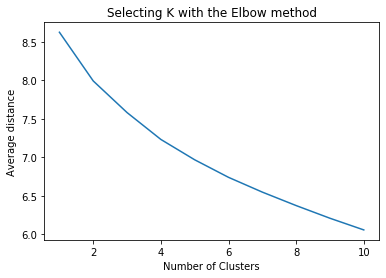

In [16]:
#Loop through cluster and fit the model to the train set
clusters= range(1,11)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data)
    clusterassign=model.predict(data)
    meandist.append(sum(np.min(cdist(data, model.cluster_centers_,'euclidean'),axis=1))
    / data.shape[0])
    

#Display the data
plt.plot(clusters,meandist)
plt.xlabel('Number of Clusters')
plt.ylabel('Average distance')
plt.title('Selecting K with the Elbow method')
plt.show()

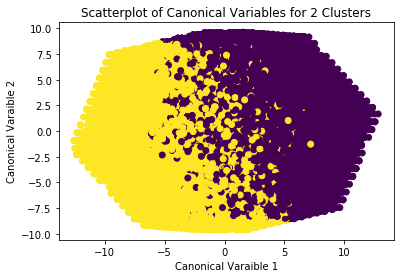

In [19]:
#Interpret 2 cluster solution
mode2Cluster=KMeans(n_clusters=2, random_state=0)
mode2Cluster.fit(data)
preds=mode2Cluster.predict(data)

#Squash the multi-Dimensional data to 2-D data

pca_algo=PCA(2)
plot_columns=pca_algo.fit_transform(data)
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,-1],c=mode2Cluster.labels_,)
plt.xlabel('Canonical Varaible 1')
plt.ylabel('Canonical Varaible 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()